## Author: Pranav Bhide

### Email Id:- bhidepranav17@gmail.com

# Forecasting future Sales
###Objective###
To predict weekly sales for each department in each store. Training data consists of weekly level sales from Feb 2010-Apr 2012. The forecasts must be submitted for the time-period May 2012 – Oct 2012. 

###Data Description###
This challenge will contain a train dataset and a test dataset.
train_sales_forecast.csv
This is the training dataset consisting of 10 stores, store 1-10, each store consisting of 99 departments and weekly sales of that department in the store.
Data Dictionary
•	Store: Store ID (1-10)
•	Dept: Department ID in that store (1-99)
•	Weekly_Sales: Weekly sales for the department (Target Variable)
•	IsHoliday: Does the week contains holiday or not (Binary variable – True/False)


### Importing Necessary Libraries & Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action="ignore")
from sklearn import metrics
colors = sns.color_palette('pastel')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Reading the data
data = pd.read_csv('train_sales_forecast.csv')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,25037.080,False
1,1,1,12-02-2010,46247.440,True
2,1,1,19-02-2010,41783.430,False
3,1,1,26-02-2010,19491.180,False
4,1,1,05-03-2010,21926.490,False


## Exploratary Data Analysis

#### Preprocessing Data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84056 entries, 0 to 84055
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         84056 non-null  int64  
 1   Dept          84056 non-null  int64  
 2   Date          84056 non-null  object 
 3   Weekly_Sales  84056 non-null  float64
 4   IsHoliday     84056 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [3]:
#generating new columns Month, Year and week
import calendar
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['week']=list(pd.DatetimeIndex(data['Date']).isocalendar()['week'])

In [4]:
data.set_index('Date', inplace=True)

In [5]:
data.index = pd.to_datetime(data.index) #making Date column as index 
data.info() #no nulls

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84056 entries, 2010-05-02 to 2012-04-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         84056 non-null  int64  
 1   Dept          84056 non-null  int64  
 2   Weekly_Sales  84056 non-null  float64
 3   IsHoliday     84056 non-null  bool   
 4   Month         84056 non-null  object 
 5   Year          84056 non-null  int64  
 6   week          84056 non-null  int32  
dtypes: bool(1), float64(1), int32(1), int64(3), object(1)
memory usage: 4.2+ MB


# checking negative sales

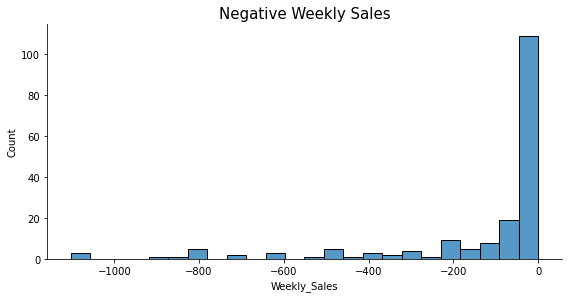

In [6]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=4,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [7]:
#removing all negative sales as it can impact our analysis
data=data[data['Weekly_Sales']>=0]

# Data visulalization

Text(0.5, 0, 'Months')

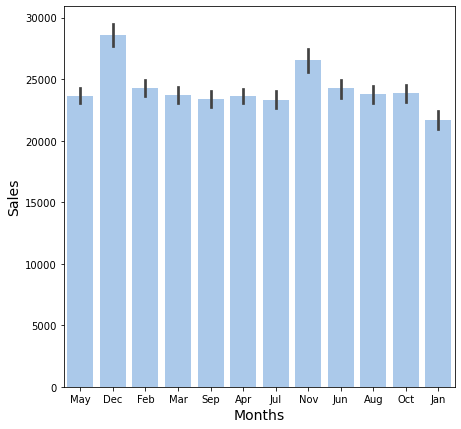

In [8]:
#plotting monthly sales
plt.figure(figsize=(7,7))
sns.barplot(x='Month',y='Weekly_Sales',data=data,color=colors[0])
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
#observation sales is almost equally distributed for all months with dec having highest sales recorded it might be due to more number of holidays

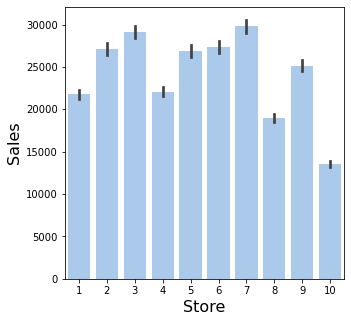

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x='Store',y='Weekly_Sales',data=data,color=colors[0])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()
#store 7 is having higest average sales over the years and store 10 is worst performer

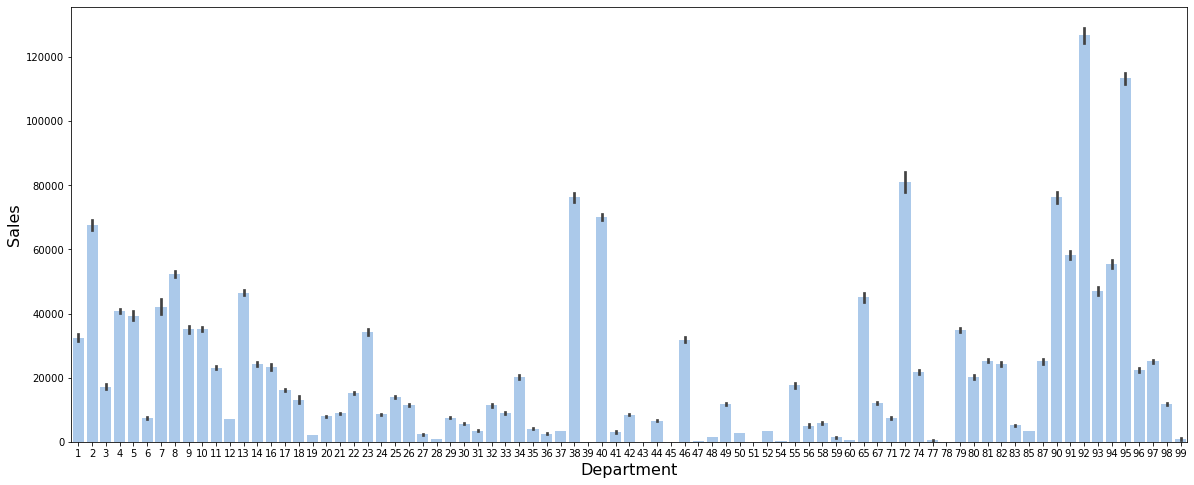

In [10]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data,color=colors[0])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()
#observation:- Department 92 is having highest average sales followed by  department 95

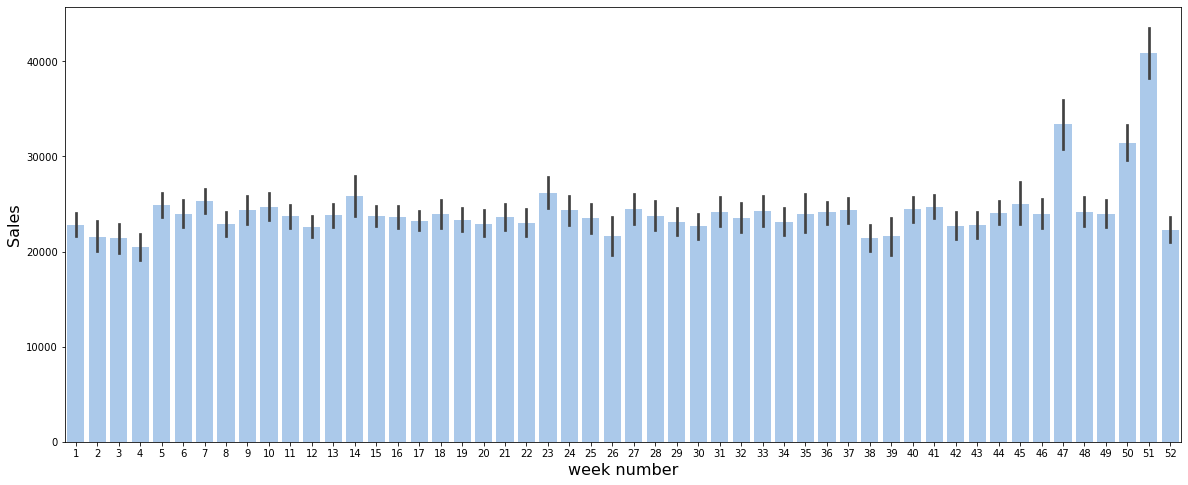

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x='week',y='Weekly_Sales',data=data,color=colors[0])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('week number', fontsize=16)
plt.show()
#observation:- as more holidays falls in the last month seeing higher sales for those weeks

# One-hot-encoding

In [12]:
#changing our categorical variables into separate columns with 1 or 0 flag
cat_col = ['Store','Dept','Month','IsHoliday']
data_cat = data[cat_col].copy()
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,IsHoliday_False,IsHoliday_True
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2010-12-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-05-03,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
data = pd.concat([data, data_cat],axis=1)#concatinating the new dataframe to orignal
data.drop(columns=cat_col,inplace=True) #dropping all the treated categorical columns

In [14]:
data

,Weekly_Sales,Year,week,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,IsHoliday_False,IsHoliday_True
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-02,25037.080,2010,17,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2010-12-02,46247.440,2010,48,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-02-19,41783.430,2010,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-26,19491.180,2010,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-05-03,21926.490,2010,18,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-02,246.110,2012,9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2012-10-02,517.330,2012,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2012-02-17,703.160,2012,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#normalizing the data using minmax scaler
minmax_scale=MinMaxScaler()
data['Weekly_Sales']= minmax_scale.fit_transform(data['Weekly_Sales'].values.reshape(-1, 1))

In [16]:
#one hot encoding dummy output generated will be multi colinear because using is_holiday_true we can easy tell is_holiday_false value
#so dropping one of the column from each
del data['Store_1']
del data['Dept_1']
del data['Month_Jan']
del data['IsHoliday_True']

# Train Test Split

In [17]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=17) #80-20 % split
X_train.head()

,Year,week,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Month_Dec,Month_Feb,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,IsHoliday_False
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-18,2011,11,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2010-07-30,2010,30,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2011-05-08,2011,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2011-01-07,2011,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2011-08-19,2011,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Training

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

In [19]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy ",lr_acc)

Linear Regressor Accuracy  78.69732369125538


In [20]:
y_pred = lr.predict(X_test)

In [21]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.011562603724529883
MSE 0.00039524097164577983
RMSE 0.01988066828971752
R2 0.7869824015151551


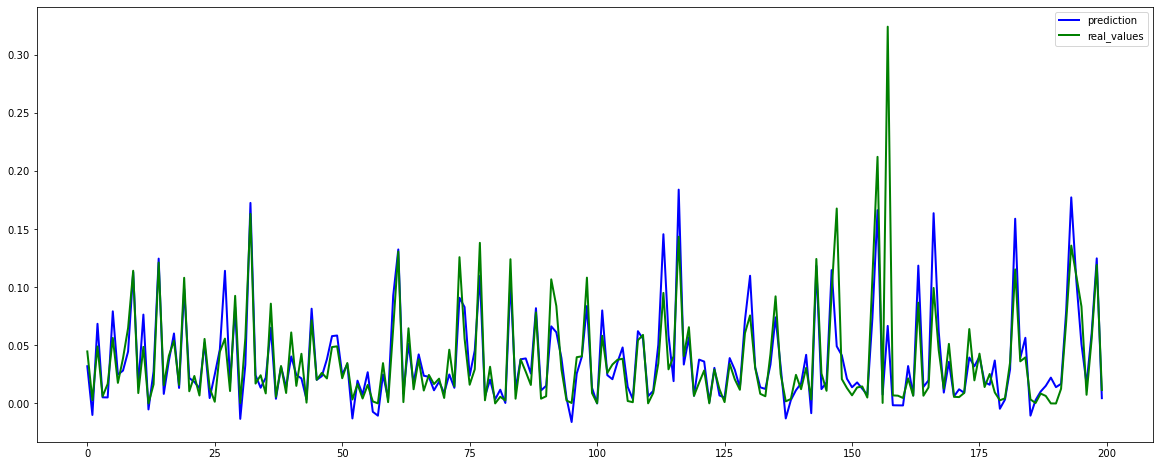

In [22]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.show()

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [24]:
rf_acc=rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy  ",rf_acc)

Random Forest Regressor Accuracy   94.24518364113695


In [25]:
y_pred = rf.predict(X_test)

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.004624447046408958
MSE 0.00010677246259364975
RMSE 0.010333076143803922
R2 0.9426353045165902


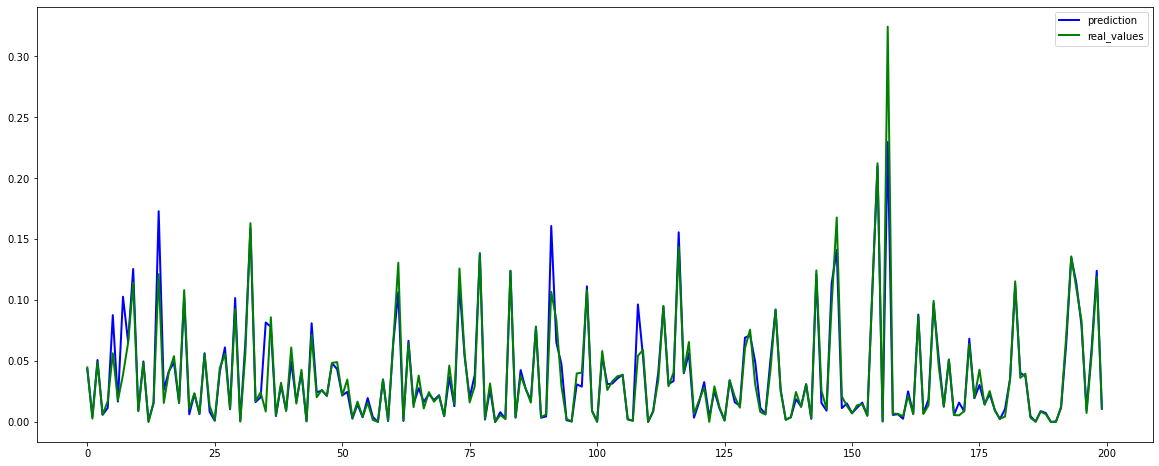

In [26]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.show()

# K Neighbors Regressor Model

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)
     

KNeighborsRegressor(n_neighbors=1)

In [29]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  54.61478113796798


In [30]:
y_pred = knn.predict(X_test)     

In [31]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.014939413151254884
MSE 0.0008420584222097214
RMSE 0.029018242920785562
R2 0.5495936188331468


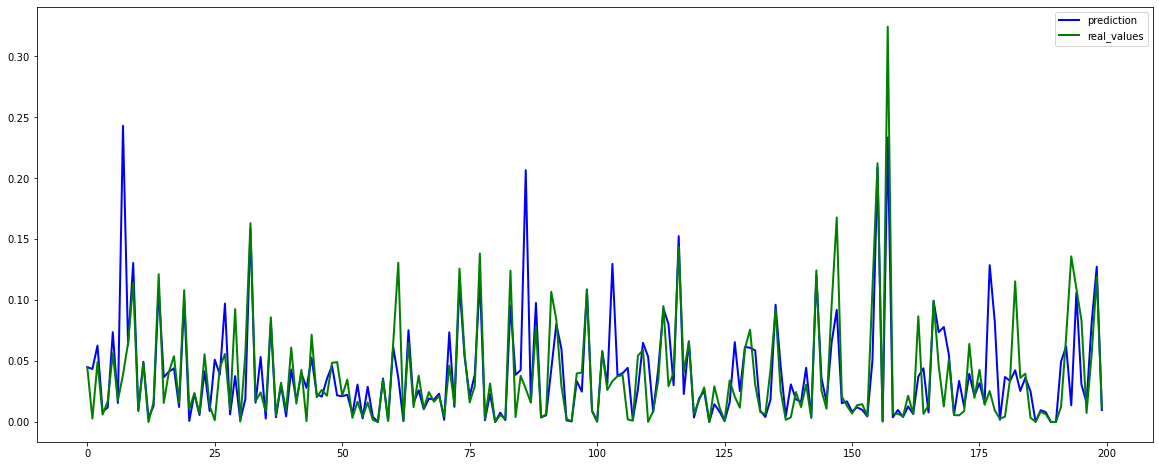

In [32]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.show()
     

# XGboost Model

In [33]:
from xgboost import XGBRegressor

In [34]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  93.88047029198543


In [35]:
y_pred = xgbr.predict(X_test)

In [36]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))    

MAE 0.005791337484695467
MSE 0.00011353920196487402
RMSE 0.010655477556865953
R2 0.9388133406014068


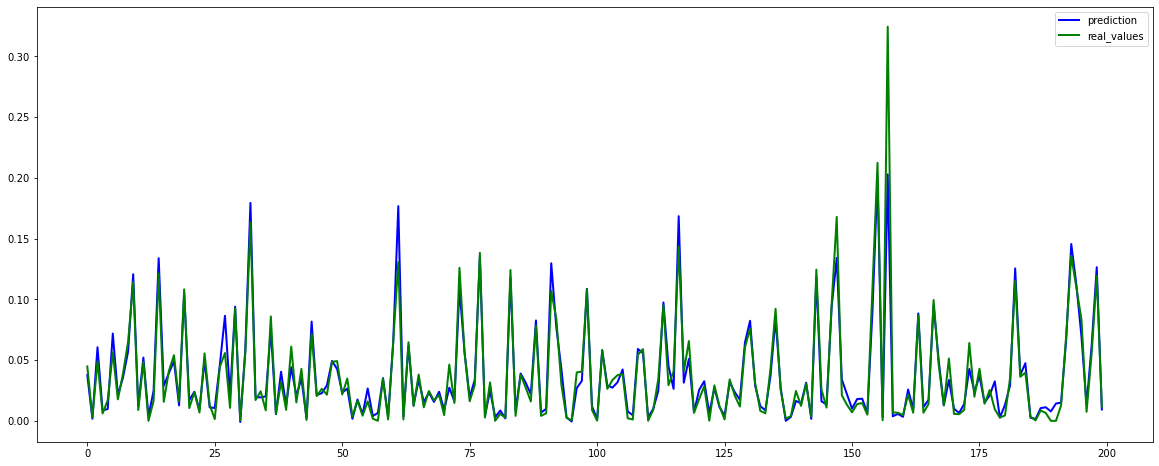

In [37]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.show()

In [38]:
#comparing all models accuracy
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'R2 accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}
acc_df = pd.DataFrame(acc)
acc_df

,model,R2 accuracy
0,lr_acc,78.697
1,rf_acc,94.245
2,knn_acc,54.615
3,xgb_acc,93.880


### We can choose either Random forest or Xgboost for building the final model, for this problem i am choosing XGboost

## Hyper Parameter tunning

In [39]:
#This code take some time to run, so uncomment it if you want to run it
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.1],
#     'subsample':[0.5,0.7,0.9],
#     'colsample_bytree': [0.3,0.7,1]
# }

# xgb = XGBRegressor()

# grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

# Final Model

In [40]:
xgbr = XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=200)
xgbr.fit(X_train, y_train)

xgb_acc_train = xgbr.score(X_train,y_train)*100
print("XGBoost Regressor train Accuracy - ",xgb_acc_train)

xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor test Accuracy - ",xgb_acc)


XGBoost Regressor train Accuracy -  95.78122438004999
XGBoost Regressor test Accuracy -  94.81286450862085


In [41]:
y_pred = xgbr.predict(X_test)

In [42]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))    

MAE 0.005184268027044956
MSE 9.623994853780059e-05
RMSE 0.00981019615185143
R2 0.9481400632215746


# Prediction on test data

In [43]:
test_data = pd.read_csv('test_sales_forecast.csv')

In [44]:
test=test_data.copy()

In [45]:
import calendar #making all the columns which we created in train
test_data['Month'] = pd.DatetimeIndex(test_data['Date']).month
test_data['Month'] = test_data['Month'].apply(lambda x: calendar.month_abbr[x])
test_data['Year'] = pd.DatetimeIndex(test_data['Date']).year
test_data['week']=list(pd.DatetimeIndex(test_data['Date']).isocalendar()['week'])
test_data.index=range(len(test_data))
test_data.drop(columns={'Date'},axis=1,inplace=True)

In [46]:
cat_col = ['Store','Dept','Month','IsHoliday'] # treating categorical variables
data_cat = test_data[cat_col].copy()

data_cat = pd.get_dummies(data_cat,columns=cat_col)

data_cat.head()
test_data = pd.concat([test_data, data_cat],axis=1)
test_data.drop(columns=cat_col,inplace=True)

In [47]:
#checking if all the columns needed for prediction using our model is present or not if not present adding those columns
for i in list(data.columns):
    if(i not in list(test_data.columns) and i!='Weekly_Sales'):
        test_data[i]=0
        print(i)

Dept_39
Dept_43
Month_Feb


In [48]:
#making the order of columns same as what model was built from and then predicting the forecast
test_inputs=test_data.copy()
cols_order = xgbr.get_booster().feature_names
test_inputs = test_inputs[cols_order]
test_preds = xgbr.predict(test_inputs)

In [49]:
tmp=pd.DataFrame(test_preds)
#removing the normalization from the data
test['Predicted_Weekly_Sales']=minmax_scale.inverse_transform(tmp.values.reshape(-1, 1))

In [50]:
#Writing it to a csv
test.to_csv('Result.csv',index=False)
test.head(10)

,Store,Dept,Date,IsHoliday,Predicted_Weekly_Sales
0,1,1,04-05-2012,False,16364.722
1,1,1,11-05-2012,False,16486.084
2,1,1,18-05-2012,False,16232.469
3,1,1,25-05-2012,False,16232.469
4,1,1,01-06-2012,False,15757.726
5,1,1,08-06-2012,False,16465.971
6,1,1,15-06-2012,False,16744.016
7,1,1,22-06-2012,False,16744.016
8,1,1,29-06-2012,False,16744.016
9,1,1,06-07-2012,False,16744.016


### one more approach to this problem could be will be using time forecasting models like ARIMA, SARIMA but due to time constrant i didn't use it

### End of code